In [1]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from PIL import Image
import os

def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

# Directory containing images
image_folder = '/content/drive/MyDrive/Computer_vision/Large_Vision_Models/CLIP_Classification/images'

# Load images from the folder
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_folder, filename)
        images.append(Image.open(img_path))

# Create and display the grid
if images:
    grid = image_grid(images, cols=3)
    display(grid)
else:
    print("No images found in the directory.")

Output hidden; open in https://colab.research.google.com to view.

In [5]:
classes = ['giraffe', 'zebra', 'elephant', 'teddybear', 'hotdog']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)

In [6]:
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[26.2836, 24.4544, 19.6819, 14.8227, 14.1760],
        [24.2384, 23.8031, 24.5945, 16.6669, 14.4600],
        [16.9787, 16.9936, 24.7597, 16.4111, 13.8733],
        [23.0606, 19.8492, 27.2278, 18.6095, 15.4316],
        [19.6150, 15.1748, 20.0311, 27.0995, 16.3831],
        [15.0464, 15.2344, 16.5656, 18.6200, 25.9556]], grad_fn=<TBackward0>)

In [7]:
probs = logits_per_image.softmax(dim=1)
probs

tensor([[8.6064e-01, 1.3817e-01, 1.1689e-03, 9.0663e-06, 4.7489e-06],
        [3.2517e-01, 2.1039e-01, 4.6425e-01, 1.6743e-04, 1.8424e-05],
        [4.1710e-04, 4.2338e-04, 9.9890e-01, 2.3645e-04, 1.8689e-05],
        [1.5248e-02, 6.1446e-04, 9.8395e-01, 1.7787e-04, 7.4122e-06],
        [5.6092e-04, 6.6153e-06, 8.5032e-04, 9.9856e-01, 2.2147e-05],
        [1.8274e-05, 2.2055e-05, 8.3486e-05, 6.5136e-04, 9.9922e-01]],
       grad_fn=<SoftmaxBackward0>)

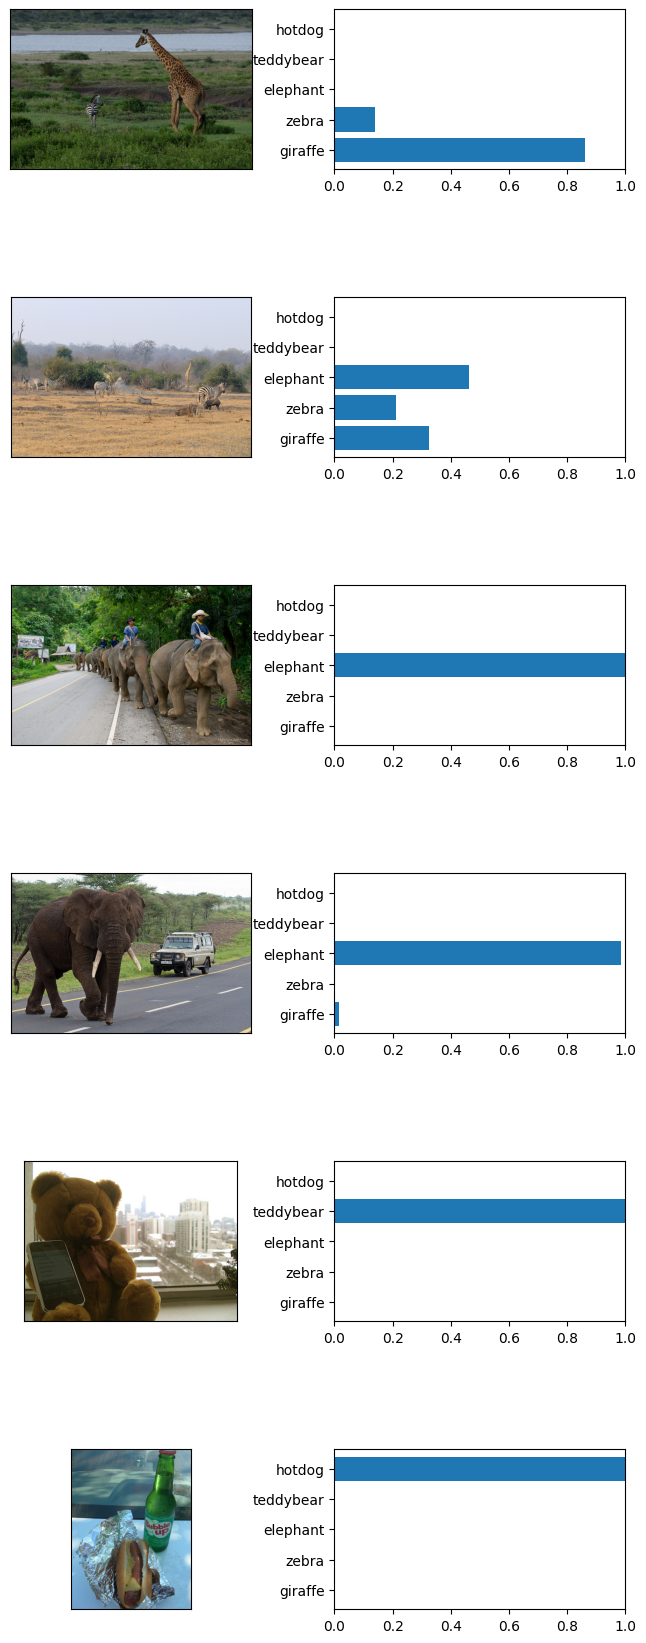

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

  # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()